In [1]:
#Data
import pandas as pd
import numpy as np
import os
import pickle

#Plot
import matplotlib.pyplot as plt

#Model
from pysr import PySRRegressor, TemplateExpressionSpec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
# # Load the pickled DataFrames
# with open('data/X_train_all.pkl', 'rb') as f:
#     X_train = pickle.load(f)

# with open('data/X_test_all.pkl', 'rb') as f:
#     X_test = pickle.load(f)

# with open('data/y_train_all.pkl', 'rb') as f:
#     y_train = pickle.load(f)

# with open('data/y_test_all.pkl', 'rb') as f:
#     y_test = pickle.load(f)

In [2]:
# Load the pickled DataFrames 2 (removed glyxerol-methanol)
with open('data/X_train_all_2.pkl', 'rb') as f:
     X_train = pickle.load(f)

with open('data/X_test_all_2.pkl', 'rb') as f:
     X_test = pickle.load(f)

with open('data/y_train_all_2.pkl', 'rb') as f:
     y_train = pickle.load(f)

with open('data/y_test_all_2.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [43]:
# # Overwrite with rearranged data
# with open('data/df_filtered_rearranged.pkl', 'rb') as f:
#     df = pickle.load(f)

# df['mix'] = df['compA'] + df['compB']
# mixtures = df['mix'].unique()

# train_mix, test_mix = train_test_split(mixtures, test_size=0.3, random_state=42)

# df = df[df['P'] != 77000]
# X_columns = ['mA', 'mB', 'KA', 'KB', 'XA', 'XB', 'Tr_A', 'Tr_B', 'Tr_mix', 'mAKA', 'mBKB', 'KAKB']
# X = df[X_columns]
# y = df['K']

# train_df = df[df['mix'].isin(train_mix)]
# test_df = df[df['mix'].isin(test_mix)]

# X_train = train_df[X_columns]
# y_train = train_df['K']
# X_test = test_df[X_columns]
# y_test = test_df['K']

In [44]:
# # Path to the 'logs' folder
# path_ref = 'logs'

# # Get a list of folder names inside the 'logs' folder
# folder_names_ref = os.listdir(path_ref)

# runtotal = len(folder_names_ref) - 1
# red_runs = 11

In [3]:
# Path to the 'outputs' folder
path = 'linux_outputs/10K'

# Get a list of folder names inside the 'outputs' folder
folder_names = [os.path.join(path,f).replace('\\', '/') for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

# Print the list of folder names
print(folder_names)

['linux_outputs/10K/20250407_111454_B7bKDy', 'linux_outputs/10K/20250407_115912_M4dvpu', 'linux_outputs/10K/20250407_125503_3SEVTh', 'linux_outputs/10K/20250407_134306_L5ya7j', 'linux_outputs/10K/20250408_152854_qNpDzj', 'linux_outputs/10K/20250408_160226_7tuMuV', 'linux_outputs/10K/20250408_163850_vyfftu', 'linux_outputs/10K/20250408_171835_iJ6HKe', 'linux_outputs/10K/20250409_095336_s1iQOw', 'linux_outputs/10K/20250409_105247_yk2cuk', 'linux_outputs/10K/20250409_113752_Tc4GSi', 'linux_outputs/10K/20250409_120816_1fthha', 'linux_outputs/10K/20250410_100349_cCxrnR', 'linux_outputs/10K/20250410_142914_1Y9BD4', 'linux_outputs/10K/20250411_131629_9zMX4d', 'linux_outputs/10K/20250411_172421_Y9VWr1', 'linux_outputs/10K/20250430_161345_EP8N1d', 'linux_outputs/10K/20250430_161706_wdOpae', 'linux_outputs/10K/20250430_171549_KcqsQc', 'linux_outputs/10K/20250430_171656_5h8Eky', 'linux_outputs/10K/20250505_142752_2ftXh4', 'linux_outputs/10K/20250506_095737_xWpjxU']


In [4]:
len(folder_names)

22

In [5]:
equations = []
errors = []
r2_scores = []
failed_folders = []  # To keep track of folders that fail to load or produce predictions
error_messages = []  # To store error messages

for folder in folder_names:
    try:
        # Attempt to load the model from the specified folder
        model = PySRRegressor.from_file(run_directory=folder)
        
        # If the model is loaded, perform the calculations
        best_equation = model.get_best().equation
        equations.append(best_equation)
        
        y_pred = model.predict(X_test) # Change between X_train and X_test
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Change between y_train and y_test
        errors.append(rmse)
        
        r2 = r2_score(y_test, y_pred) # Change between y_train and y_test
        r2_scores.append(r2)
    
    except Exception as e:
        # If an error occurs, store the folder and the error message
        failed_folders.append(folder)
        error_message = str(e)
        error_messages.append(error_message)
        
        # Append custom message based on the error
        if "Ran out of input" in error_message:
            equations.append("Ran out of input")
        else:
            equations.append("Run failed")
        
        # Append default values when the process fails
        errors.append(1)
        r2_scores.append(0)

Attempting to load model from linux_outputs\10K\20250407_111454_B7bKDy\checkpoint.pkl...


Attempting to load model from linux_outputs\10K\20250407_115912_M4dvpu\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250407_125503_3SEVTh\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250407_134306_L5ya7j\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250408_152854_qNpDzj\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250408_160226_7tuMuV\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250408_163850_vyfftu\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250408_171835_iJ6HKe\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250409_095336_s1iQOw\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250409_105247_yk2cuk\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250409_113752_Tc4GSi\checkpoint.pkl...
Attempting to load model from linux_outputs\10K\20250409_120816_1fthha\checkpoint.pkl...
Attempting to load mo

In [6]:
for i,e in enumerate(equations, start=1):
    print(f"Equation {i}: {e}")

Equation 1: mAKA + ((0.996638 + (((abs((mBKB + mAKA) - KB) * (KB - 0.20951825)) / (KB - 0.20968959)) * -3.3877556)) * mBKB)
Equation 2: ((KB + (((((abs(KA - KB) / (0.20959033 - KA)) * 0.5912428) * mA) * (KA - 0.20961054)) - KA)) * mB) + KA
Equation 3: ((mA * (KA - KB)) / ((mB * ((Tr_A + -0.53305703) / (Tr_A - 0.5327923))) + 0.9920192)) + KB
Equation 4: ((mB * KB) + (KA * mA)) / 1.011524
Equation 5: (((0.09841291 - abs(abs((Tr_mix / Tr_A) - (KB * 6.419712)) - (Tr_mix * Tr_mix))) * (mA * mBKB)) + mAKA) + mBKB
Equation 6: (mBKB + mAKA) * 0.98860735
Equation 7: KA - ((abs(mA * (abs(KA - 0.17313556) - (0.005137507 / KB))) + (KA - KB)) * mB)
Equation 8: ((((abs(mA * ((0.23760122 - abs((0.17486389 - KA) * -2.493696)) - KB)) * -0.3289948) + KB) - KA) * mB) + KA
Equation 9: KB - ((KB - KA) * (mA / ((Tr_B + ((mB * (sqrt(abs(Tr_A + (KA / -0.39326376))) - 0.10453135)) / Tr_B)) / Tr_B)))
Equation 10: KB - ((KB - KA) * (mA / ((mB / (1.3046782 - (-0.0012570996 / (KA - 0.20996119)))) + 1.0049238)))
Eq

In [7]:
for i, e in enumerate(errors, start=1):
    print(f"Equation {i}: {e}")

Equation 1: 0.0034014159636464236
Equation 2: 0.0033766451290296
Equation 3: 0.005500620238308246
Equation 4: 0.004049533248371556
Equation 5: 0.004602220310915944
Equation 6: 0.004049534012859878
Equation 7: 0.0036641226816324195
Equation 8: 0.0036277151736310263
Equation 9: 0.005986683918988107
Equation 10: 0.005192038871657228
Equation 11: 0.003525889063565351
Equation 12: 0.003863534510778398
Equation 13: 0.0036658729161987234
Equation 14: 0.0033108840986353326
Equation 15: 0.027189260747239614
Equation 16: 0.0034860788160605656
Equation 17: 0.0034086593792786277
Equation 18: 0.00337794438383541
Equation 19: 0.0033774597665223206
Equation 20: 0.003378193355823013
Equation 21: 0.0033254657531402274
Equation 22: 0.005294363708530102


In [8]:
run_r2 = []
for i, e in enumerate(r2_scores, start=1):
    run_number = i + 1
    run_r2.append([run_number,e])
    print(f"Run {i}: {e}")

Run 1: 0.9762999698058356
Run 2: 0.976643904135369
Run 3: 0.9380198343201662
Run 4: 0.9664077304751588
Run 5: 0.9566125408717434
Run 6: 0.966407717791771
Run 7: 0.9724976743285019
Run 8: 0.9730414970696344
Run 9: 0.926582081689834
Run 10: 0.9447788713783924
Run 11: 0.9745336504636777
Run 12: 0.9694227094592118
Run 13: 0.9724713940853827
Run 14: 0.9775447774251564
Run 15: -0.514342836041449
Run 16: 0.9751054768660328
Run 17: 0.9761989225018253
Run 18: 0.9766259269084092
Run 19: 0.9766326331573353
Run 20: 0.976622481201057
Run 21: 0.9773465492034955
Run 22: 0.9425808242719103


In [9]:
top10_r2 = sorted(run_r2, key=lambda x: x[1], reverse=True)
for i, e in top10_r2:
    print(f"Run {i-1}: {e}")

Run 14: 0.9775447774251564
Run 21: 0.9773465492034955
Run 2: 0.976643904135369
Run 19: 0.9766326331573353
Run 18: 0.9766259269084092
Run 20: 0.976622481201057
Run 1: 0.9762999698058356
Run 17: 0.9761989225018253
Run 16: 0.9751054768660328
Run 11: 0.9745336504636777
Run 8: 0.9730414970696344
Run 7: 0.9724976743285019
Run 13: 0.9724713940853827
Run 12: 0.9694227094592118
Run 4: 0.9664077304751588
Run 6: 0.966407717791771
Run 5: 0.9566125408717434
Run 10: 0.9447788713783924
Run 22: 0.9425808242719103
Run 3: 0.9380198343201662
Run 9: 0.926582081689834
Run 15: -0.514342836041449


In [10]:
X_all = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_all = pd.concat([y_train, y_test], axis=0, ignore_index=True)
X_all

,mA,mB,KA,KB,Tr_A,Tr_B,XA,XB,T,Tc_A,Tc_B,Tr_mix,mAKA,mBKB,KAKB
0,0.000000,1.000000,0.1257,0.2013,0.510443,0.581756,0.000000,1.000000,298.15,584.1,512.5,0.581756,0.000000,0.201300,0.025303
1,0.239964,0.760036,0.1257,0.2013,0.510443,0.581756,0.075798,0.975737,298.15,584.1,512.5,0.606332,0.030164,0.152995,0.025303
2,0.468233,0.531767,0.1257,0.2013,0.510443,0.581756,0.197459,0.911439,298.15,584.1,512.5,0.631027,0.058857,0.107045,0.025303
3,0.709924,0.290076,0.1257,0.2013,0.510443,0.581756,0.424668,0.705246,298.15,584.1,512.5,0.627050,0.089237,0.058392,0.025303
4,1.000000,0.000000,0.1257,0.2013,0.510443,0.581756,1.000000,0.000000,298.15,584.1,512.5,0.510443,0.125700,0.000000,0.025303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.000000,1.000000,0.1102,0.1435,0.636151,0.413278,0.000000,1.000000,298.80,469.7,723.0,0.413278,0.000000,0.143500,0.015814
1410,0.488096,0.511904,0.1102,0.1435,0.636151,0.413278,0.670188,0.223951,298.80,469.7,723.0,0.518895,0.053788,0.073458,0.015814
1411,0.675945,0.324055,0.1102,0.1435,0.636151,0.413278,0.834876,0.127527,298.80,469.7,723.0,0.583811,0.074489,0.046502,0.015814
1412,0.774971,0.225029,0.1102,0.1435,0.636151,0.413278,0.900731,0.083334,298.80,469.7,723.0,0.607441,0.085402,0.032292,0.015814


Attempting to load model from linux_outputs\10K\20250410_142914_1Y9BD4\checkpoint.pkl...


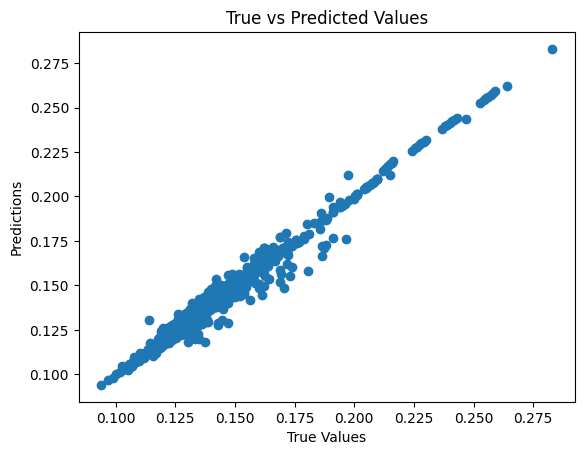

In [ ]:
folder_index = 14 - 1 #Change the first value to run number
model = PySRRegressor.from_file(run_directory=folder_names[folder_index])

# If the model is loaded, perform the calculations
model.get_best().equation
y_pred = model.predict(X_all)
rmse = np.sqrt(mean_squared_error(y_pred, y_all))
r2 = r2_score(y_all, y_pred)

plt.scatter(y_all, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [13]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Precentage Error: {np.mean(np.abs((y_all - y_pred) / y_all)) * 100:.2f}%")

RMSE: 0.003378367201667391
R2 Score: 0.9794708064247091
Precentage Error: 1.35%


MIXING RULES

Filippov and Novoselova

K = [0.72 * mB^2 + mB(1-0.72)](KB-KA) + KA 

In [88]:
C = 0.72
y_pred = (C*X_test['mB']*X_test['mB'] + X_test['mB']*(1-C))*(X_test['KB']-X_test['KA'])+X_test['KA']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [89]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0063979964916110795
R2 Score: 0.9161472320170982


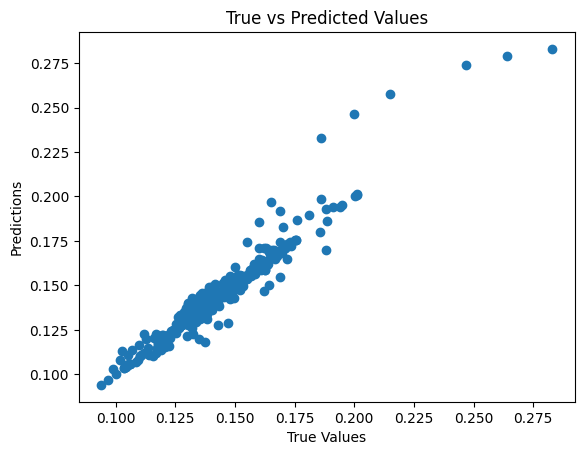

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

Filippov and Novoselova

K = KAmA + KBmB - 0.72*|KA - KB|mAmB
C = 0.72

In [91]:
y_pred = X_test['KA']*X_test['mA'] + X_test['KB']*X_test['mB'] - 0.72*abs(X_test['KA'] - X_test['KB'])*X_test['mA']*X_test['mB']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003511421651354326
R2 Score: 0.9747422085294567


In [92]:
y_pred = X_train['KA']*X_train['mA'] + X_train['KB']*X_train['mB'] - 0.72*abs(X_train['KA'] - X_train['KB'])*X_train['mA']*X_train['mB']
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003649151761305554
R2 Score: 0.9771686854881189


Filippov and Novoselova (Optimized C)

K = KAmA + KBmB - 0.5*|KA - KB|mAmB
C = 0.5

In [93]:
y_pred = X_test['KA']*X_test['mA'] + X_test['KB']*X_test['mB'] - 0.5*abs(X_test['KA'] - X_test['KB'])*X_test['mA']*X_test['mB']
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0033717262478139515
R2 Score: 0.9767119019128289


In [94]:
y_pred = X_train['KA']*X_train['mA'] + X_train['KB']*X_train['mB'] - 0.5*abs(X_train['KA'] - X_train['KB'])*X_train['mA']*X_train['mB']
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003373724506038095
R2 Score: 0.980485101454601


In [95]:
# # Optimized C whole dataset
# y_pred = X_all['KA']*X_all['mA'] + X_all['KB']*X_all['mB'] - 0.5*abs(X_all['KA'] - X_all['KB'])*X_all['mA']*X_all['mB']
# rmse = np.sqrt(mean_squared_error(y_all, y_pred))
# r2 = r2_score(y_all, y_pred)
# print(f"RMSE: {rmse}")
# print(f"R2 Score: {r2}")

Jamieson and Irving 

In [96]:
def calc_K(df):
    if df['KA'] > df['KB']:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KA'] - df['KB']) * df['mA'] * (1 - np.sqrt(df['mA']))
    else:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KB'] - df['KA']) * df['mB'] * (1 - np.sqrt(df['mB']))

y_pred = X_test.apply(calc_K, axis=1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003422244470310652
R2 Score: 0.9760088277472114


In [97]:
def calc_K(df):
    if df['KA'] > df['KB']:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KA'] - df['KB']) * df['mA'] * (1 - np.sqrt(df['mA']))
    else:
        return df['KA'] * df['mA'] + df['KB'] * df['mB'] - (df['KB'] - df['KA']) * df['mB'] * (1 - np.sqrt(df['mB']))

y_pred = X_train.apply(calc_K, axis=1)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.0035109895666410235
R2 Score: 0.9788648105997547


Vredeveld (1973)

In [98]:
def calc_K_vre(df):
    if df['mA'] == 0:
        return df['KB']
    elif df['mB'] == 0:
        return df['KA']
    else:
        return (df['mA']*(df['KA']**-2))**-0.5 + (df['mB']*(df['KB']**-2))**-0.5

y_pred = y_pred = X_test.apply(calc_K_vre, axis=1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.2809901065046662
R2 Score: -160.73777559719153


Alexey Melkikh & Pavel Skripov

In [99]:
y_pred = 2*(X_test['KA'] * X_test['mA'] 
            + X_test['KB'] * X_test['mB'] 
            - ((X_test['KA'] * X_test['KB']) / (X_test['mA']*X_test['KB'] + X_test['mB']*X_test['KA']))
            )/(X_test['mA'] + X_test['mB'])

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.14343234593566617
R2 Score: -41.1428217644789


Frenkel

In [100]:
y_pred = np.exp((X_test['XA']**2) * np.log(X_test['KA']) + 
                (X_test['XB']**2) * np.log(X_test['KB']) + 
                2 * X_test['XA'] * X_test['XB'] * np.log((X_test['KA'] + X_test['KB']) / 2))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.014991879972080657
R2 Score: 0.5395933359711758


MISC

In [101]:
with open('data/df_filtered.pkl', 'rb') as f:
    df_filtered = pickle.load(f)

In [102]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,KB,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.575,0.425,313.15,101325.0,0.1382,0.482913,0.517087,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.465864,0.064469,0.075029,0.019371
5,undecane,hexadecane,0.656,0.344,313.15,101325.0,0.1376,0.568287,0.431713,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.470476,0.075866,0.062642,0.019371
6,undecane,hexadecane,0.786,0.214,313.15,101325.0,0.136,0.717141,0.282859,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.477878,0.095738,0.041043,0.019371
7,undecane,hexadecane,0.905,0.095,313.15,101325.0,0.1346,0.868001,0.131999,1120-21-4,...,0.1451,undecanehexadecane,639.00,723.0,0.490063,0.433126,0.484654,0.115878,0.019153,0.019371


In [103]:
# Condition where KB > KA
swap_mask = df_filtered['KB'] > df_filtered['KA']

# Swap values where condition is met
df_filtered.loc[swap_mask, ['KA', 'KB']] = df_filtered.loc[swap_mask, ['KB', 'KA']].values
df_filtered.loc[swap_mask, ['mA', 'mB']] = df_filtered.loc[swap_mask, ['mB', 'mA']].values
df_filtered.loc[swap_mask, ['XA', 'XB']] = df_filtered.loc[swap_mask, ['XB', 'XA']].values
df_filtered.loc[swap_mask, ['Tr_A', 'Tr_B']] = df_filtered.loc[swap_mask, ['Tr_B', 'Tr_A']].values
df_filtered.loc[swap_mask, ['MW_A', 'MW_B']] = df_filtered.loc[swap_mask, ['MW_B', 'MW_A']].values
df_filtered.loc[swap_mask, ['CAS_A', 'CAS_B']] = df_filtered.loc[swap_mask, ['CAS_B', 'CAS_A']].values
df_filtered.loc[swap_mask, ['SMILES_A', 'SMILES_B']] = df_filtered.loc[swap_mask, ['SMILES_B', 'SMILES_A']].values

In [104]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,KB,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,0.1360,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.425,0.575,313.15,101325.0,0.1382,0.517087,0.482913,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.465864,0.064469,0.075029,0.019371
5,undecane,hexadecane,0.344,0.656,313.15,101325.0,0.1376,0.431713,0.568287,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.470476,0.075866,0.062642,0.019371
6,undecane,hexadecane,0.214,0.786,313.15,101325.0,0.136,0.282859,0.717141,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.477878,0.095738,0.041043,0.019371
7,undecane,hexadecane,0.095,0.905,313.15,101325.0,0.1346,0.131999,0.868001,544-76-3,...,0.1335,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.484654,0.115878,0.019153,0.019371


In [105]:
from sklearn.linear_model import LinearRegression

B = ((X_train['KA']**2)*(X_train['KB']**2)*(X_train['mA']**2)*(X_train['mB']**2)).values.reshape(-1, 1)
K = y_train.values

model_lin = LinearRegression()
model_lin.fit(B,K)

# Get the slope (coefficient) and intercept
slope = model_lin.coef_[0]  # Since there is only one feature, extract the first coefficient
intercept = model_lin.intercept_

# Print results
print(f"Optimal x (slope): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# R-squared value (how well the model fits)
r2 = model_lin.score(B, K)
print(f"R-squared: {r2:.4f}")

Optimal x (slope): 569.6964
Intercept: 0.1344
R-squared: 0.2412


In [106]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] + 210*(X_test['KA']**2)*(X_test['KB']**2)*(X_test['mA']**2)*(X_test['mB']**2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [107]:
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.007773390151326346
R2 Score: 0.8762200395516109


In [108]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] - 0.5*(X_test['KA'])*(X_test['KB'])*(X_test['mA'])*(X_test['mB'])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003777485948886851
R2 Score: 0.9707695754507213


In [109]:
y_pred = X_test['mA']*X_test['KA'] + X_test['mB']*X_test['KB'] - 30.28438*(X_test['KA']**2)*(X_test['KB']**2)*(X_test['mA'])*(X_test['mB'])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 0.003580093180804167
R2 Score: 0.9737446344784114


In [110]:
df_filtered['K_reduced'] = df_filtered['K'] - df_filtered['mAKA'] - df_filtered['mBKB']

In [111]:
df_filtered

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,...,mix,Tc_A,Tc_B,Tr_A,Tr_B,Tr_mix,mAKA,mBKB,KAKB,K_reduced
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.453116,0.000000,0.136000,0.020917,0.0
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.459646,0.011494,0.125837,0.020917,-0.00103
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.463438,0.018382,0.119745,0.020917,-0.002227
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.473901,0.038264,0.102164,0.020917,-0.004129
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,...,"1,1'-oxybis(2-methoxyethane)dodecane",569.71,658.0,0.523336,0.453116,0.482608,0.055863,0.086602,0.020917,-0.004465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,undecane,hexadecane,0.425,0.575,313.15,101325.0,0.1382,0.517087,0.482913,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.465864,0.064469,0.075029,0.019371,-0.001298
5,undecane,hexadecane,0.344,0.656,313.15,101325.0,0.1376,0.431713,0.568287,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.470476,0.075866,0.062642,0.019371,-0.000908
6,undecane,hexadecane,0.214,0.786,313.15,101325.0,0.136,0.282859,0.717141,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.477878,0.095738,0.041043,0.019371,-0.000781
7,undecane,hexadecane,0.095,0.905,313.15,101325.0,0.1346,0.131999,0.868001,544-76-3,...,undecanehexadecane,639.00,723.0,0.433126,0.490063,0.484654,0.115878,0.019153,0.019371,-0.000431


In [112]:
with open('data/df_filtered_reduced.pkl', 'wb') as f:
    pickle.dump(df_filtered, f)